In [115]:
import matplotlib.pyplot as plt
import numpy
!pip install nltk
from nltk.corpus import stopwords
import re
import pandas as pd
df = pd.read_csv('userStories/Book1.csv')
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score

Defaulting to user installation because normal site-packages is not writeable


In [116]:
df.head()

,attribute,class
0,feedbacks,user
1,contributions,user
2,timezone,user
3,interests,user
4,location,user


In [117]:
len(df.value_counts())

41

In [118]:
df["class"].unique()

array(['user', 'book'], dtype=object)

# Checking for NULLs and removing them

In [119]:
df.isnull().sum()

attribute    0
class        0
dtype: int64

# Dropping duplicates

In [120]:
df.shape

(42, 2)

In [121]:
df.drop_duplicates(inplace=True)
df.shape

(41, 2)

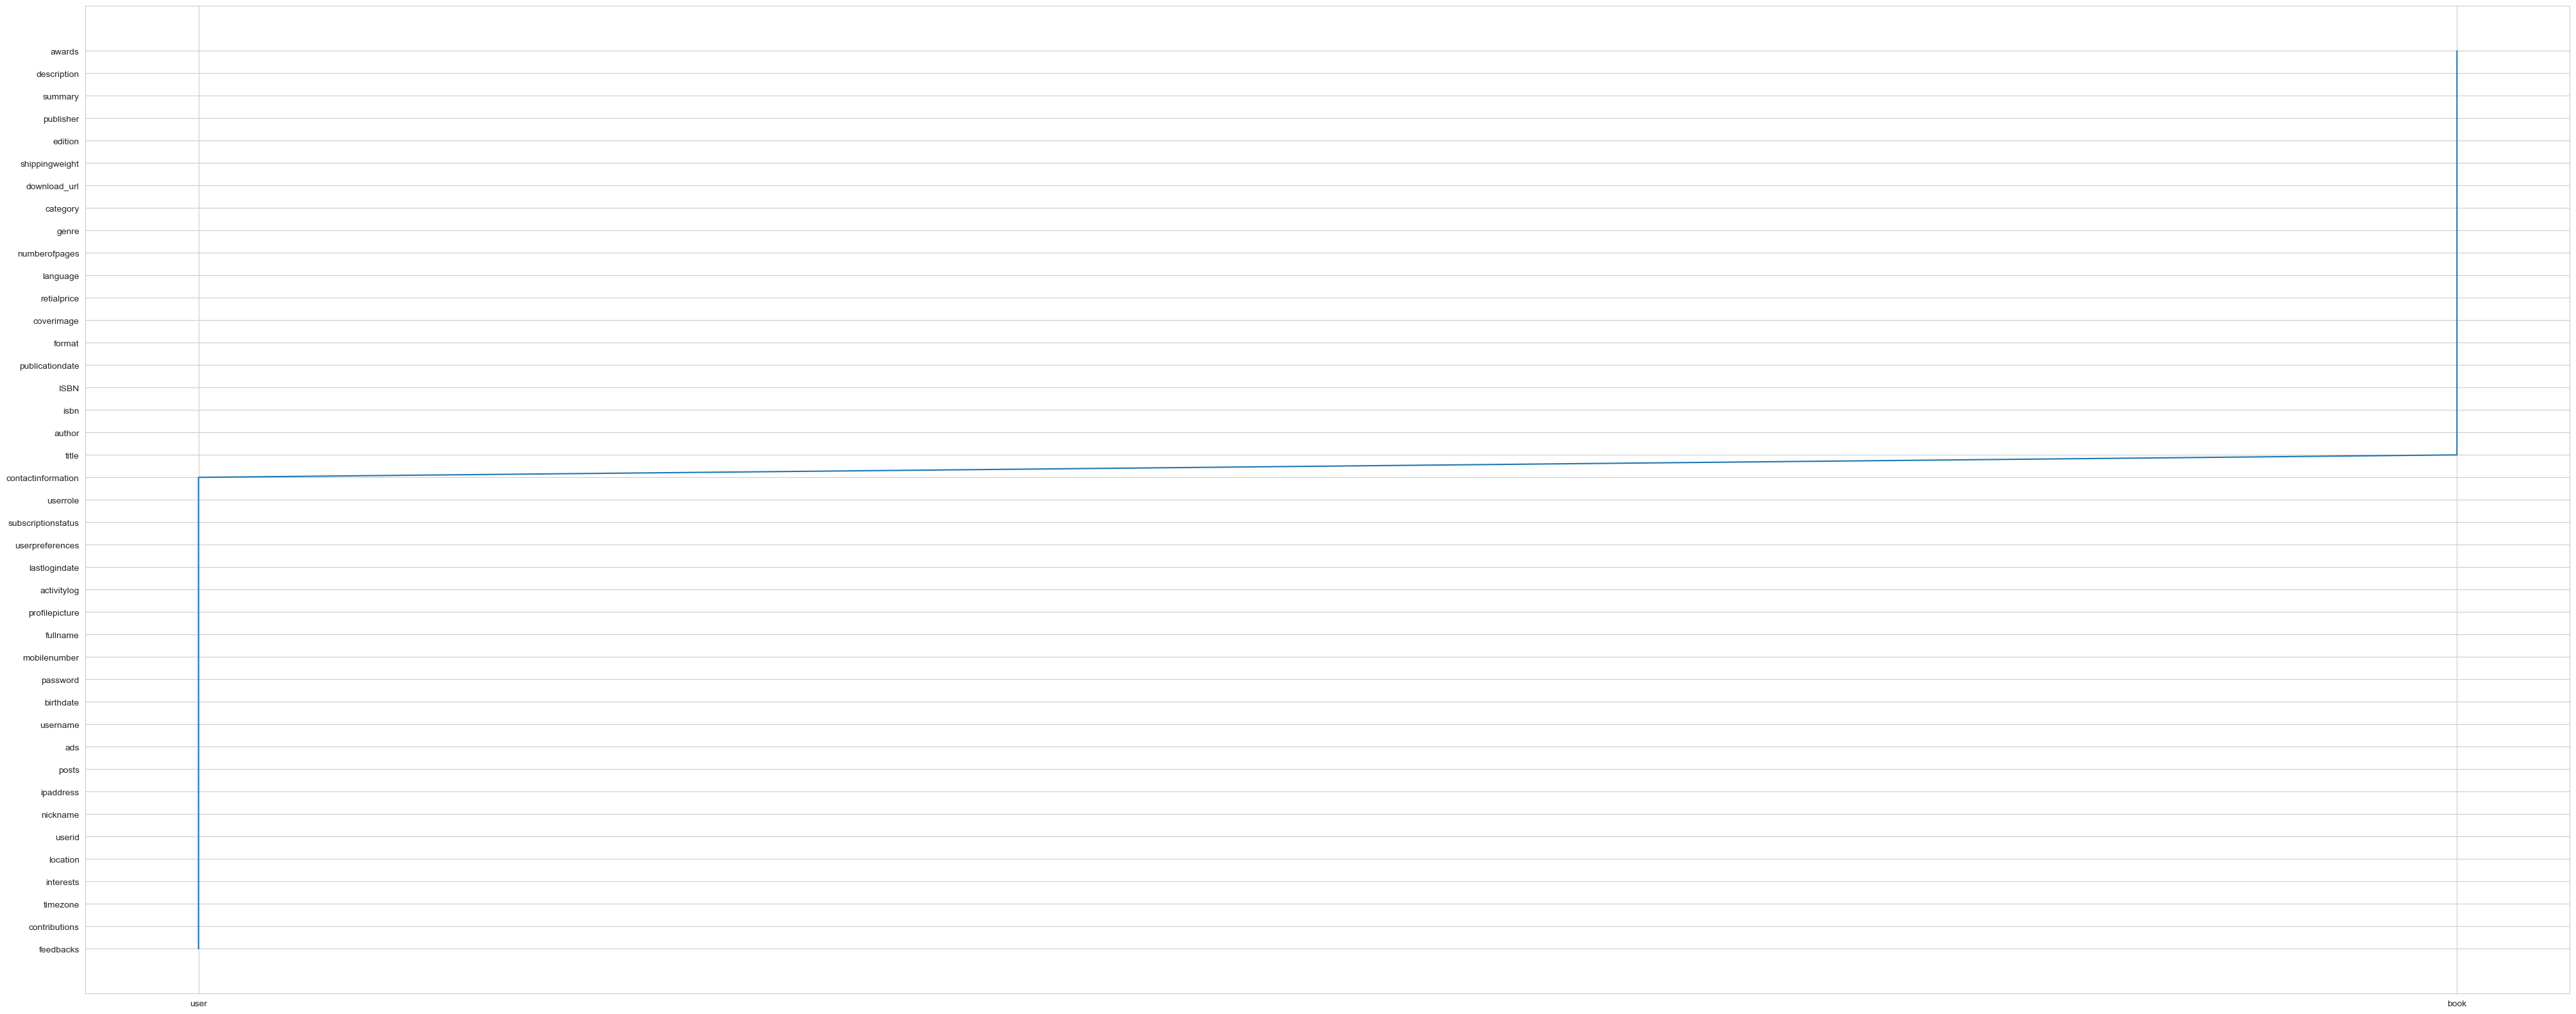

In [122]:

import matplotlib.pyplot as plt
plt.figure(figsize=(50,20))


plt.plot(df["class"],df["attribute"])

# Preprocessing the text

In [123]:
print(df['attribute'].apply(lambda x: len(x.split(' '))).sum())

41


In [124]:
special_character_remover = re.compile('[/(){}\[\]\|@,;]')
extra_symbol_remover = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

In [125]:
def clean_text(text):
    text = text.lower()
    text = special_character_remover.sub(' ', text)
    text = extra_symbol_remover.sub('', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS)
    return text
    
df['attribute'] = df['attribute'].apply(clean_text)

In [126]:
print(df['attribute'].apply(lambda x: len(x.split(' '))).sum())

41


# Train Test split

In [127]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
X = df['attribute'].apply(clean_text)

y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state =42,shuffle=True)

In [128]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((30,), (11,), (30,), (11,))

# Applying Logistic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import precision_score,f1_score

lr = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', LogisticRegression()),
              ])

lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)

print(f"Accuracy is : {accuracy_score(y_pred1,y_test)}")
for i,x in enumerate(X_test):
    print("attribute " , x,"                    class " , y_pred1[i])


Accuracy is : 0.45454545454545453
attribute  isbn                     class  user
attribute  mobilenumber                     class  user
attribute  posts                     class  user
attribute  isbn                     class  user
attribute  location                     class  user
attribute  awards                     class  user
attribute  subscriptionstatus                     class  user
attribute  description                     class  user
attribute  retialprice                     class  user
attribute  nickname                     class  user
attribute  publicationdate                     class  user


# Applying Naive Bayes Classifier

In [130]:
from sklearn.naive_bayes import MultinomialNB


naivebayes = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])

naivebayes.fit(X_train, y_train)
y_pred1 = naivebayes.predict(X_test)
score=naivebayes.score(X_test,y_test)

print(f"Accuracy is : {score}")
for i,x in enumerate(X_test):
    print("attribute " , x,"                    class " , y_pred1[i])

Accuracy is : 0.45454545454545453
attribute  isbn                     class  user
attribute  mobilenumber                     class  user
attribute  posts                     class  user
attribute  isbn                     class  user
attribute  location                     class  user
attribute  awards                     class  user
attribute  subscriptionstatus                     class  user
attribute  description                     class  user
attribute  retialprice                     class  user
attribute  nickname                     class  user
attribute  publicationdate                     class  user


# GaussianNB


In [131]:
from sklearn.naive_bayes import GaussianNB
from scipy.sparse import csr_matrix

In [132]:

tfidf=TfidfVectorizer(analyzer="word",max_features=5000)
corpus = df['attribute']
Xfeatures1 = tfidf.fit_transform(corpus)
Xfeatures1.todense

<bound method spmatrix.todense of <41x40 sparse matrix of type '<class 'numpy.float64'>'
	with 41 stored elements in Compressed Sparse Row format>>

In [140]:

X_train, X_test, y_train, y_test = train_test_split(Xfeatures1.toarray(), y, test_size=0.25, random_state =100,shuffle=True)

In [144]:
# Build a Gaussian Classifier
from sklearn.metrics import precision_score,f1_score

model=  GaussianNB()

# Model training

model.fit(X_train,y_train)
# Predict Output
y_predit=model.predict(X_test)
f1_score(y_test,y_predit)
print(f'accuracy {accuracy_score(y_predit,y_test)}')
print(f'f1score {f1_score(y_test,y_predit)}')


ValueError: pos_label=1 is not a valid label. It should be one of ['book', 'user']

In [142]:
d = {'col2': y_predit, 'col3': y_test}
df = pd.DataFrame(data=d)
df

,col2,col3
27,book,book
5,book,user
6,book,user
37,book,book
21,book,user
0,book,user
20,book,user
41,book,book
34,book,book
35,book,book


# Applying Xgboost Classifier

In [556]:
df = pd.read_csv('userStories/Book1.csv')
possible_labels = df["class"]
label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

df['label'] = df["class"].replace(label_dict)

In [558]:

X_train, X_test, y_train, y_test = train_test_split(Xfeatures1.toarray(),df["label"] , test_size=0.25, random_state =1,shuffle=True)

ValueError: Found input variables with inconsistent numbers of samples: [179, 181]

In [559]:
!pip install xgboost
from xgboost import XGBClassifier

xgboost = XGBClassifier()

xgboost.fit(X_train, y_train)

y_pred = xgboost.predict(X_test)

print(f'accuracy {accuracy_score(y_pred,y_test)}')


Defaulting to user installation because normal site-packages is not writeable


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2 3 4 5 6 7 8], got ['book' 'car' 'creditcard' 'customer' 'employee' 'music' 'student' 'user'
 'website']

# Applying BERT

In [ ]:
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer

In [ ]:
from transformers import BertForSequenceClassification

In [ ]:
from torch.utils.data import TensorDataset

In [ ]:
possible_labels = df["class"].unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

In [560]:
df['label'] = df["class"].replace(label_dict)
df['label']

0       21
1       21
2       21
3       21
4       21
      ... 
176    180
177    180
178    180
179    180
180    180
Name: label, Length: 181, dtype: int64

In [561]:
df.head()

,attribute,class,label
0,feedbacks,user,21
1,contributions,user,21
2,timezone,user,21
3,interests,user,21
4,location,user,21


In [562]:
X_train, X_val, y_train, y_val = train_test_split(df["attribute"],
                                                  df["class"],
                                                  test_size=0.50,
                                                  random_state=42, 
                                                  stratify=df.label.values)

df['data_type'] = ['not_set']*df.shape[0]

df.loc[X_train, 'data_type'] = 'train'
df.loc[X_val, 'data_type'] = 'val'

df.groupby(['class', 'attribute', 'data_type']).count()

KeyError: "None of [Index(['format', 'employmenttype', 'color', 'income', 'id', 'title',\n       'customername', 'userid', 'releasedate', 'publicationdate',\n       'numberofdoors', 'author', 'ISBN', 'class_level', 'trainingrecords',\n       'paymentid', 'playcount', 'billingaddress', 'contributions',\n       'creditscore', 'seatingcapacity', 'opinion', 'mobilenumber', 'id',\n       'lyrics', 'familysize', 'uptime', 'hostingprovider',\n       'loyaltyprogrammembership', 'campus_involvement', 'entertainmentsystem',\n       'language', 'transmission', 'formatmusic', 'safetyfeatures',\n       'information', 'scholarship_status', 'enginesize', 'genre',\n       'mailingaddress', 'album', 'graduation_date', 'terminationdate',\n       'birthdate', 'cardhistory', 'compensation', 'retialprice', 'timezone',\n       'subscriptionstatus', 'cardholdername', 'ads', 'responsiveness',\n       'licensinginformation', 'issuer', 'keywords', 'suspensiontype',\n       'download_url', 'posts', 'employeename', 'work_experience', 'last_name',\n       'numberofdownloads', 'map', 'artist', 'topspeed', 'student_id',\n       'balance', 'technology', 'gpa', 'activitylog', 'timeoff', 'summary',\n       'status', 'url', 'email_address', 'termsofservices',\n       'Departmentofemployee', 'language', 'fanfeedback',\n       'communicationpreferences', 'domainname', 'employmentstatus',\n       'transcript', 'fullname', 'category', 'cardtype', 'price', 'feedbacks',\n       'interestrate', 'model'],\n      dtype='object')] are in the [index]"

In [563]:
df.head()

,attribute,class,label,data_type
0,feedbacks,user,21,not_set
1,contributions,user,21,not_set
2,timezone,user,21,not_set
3,interests,user,21,not_set
4,location,user,21,not_set


In [564]:
df.head()

,attribute,class,label,data_type
0,feedbacks,user,21,not_set
1,contributions,user,21,not_set
2,timezone,user,21,not_set
3,interests,user,21,not_set
4,location,user,21,not_set


In [566]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', 
                                          do_lower_case=True)

NameError: name 'BertTokenizer' is not defined

In [567]:
encoded_data_train = tokenizer.batch_encode_plus(
    df[df.data_type=='train'].attribute.values,
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=256, 
    return_tensors='pt'
)


NameError: name 'tokenizer' is not defined

In [568]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(df[df.data_type=='train'].label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(df[df.data_type=='val'].label.values)

dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

NameError: name 'encoded_data_train' is not defined

In [569]:
encoded_data_val = tokenizer.batch_encode_plus(
    df[df.data_type=='val'].attribute.values,
    add_special_tokens=True,
    return_attention_mask=True,
    pad_to_max_length=True,
    max_length=256,
    return_tensors='pt'
)


NameError: name 'tokenizer' is not defined

In [570]:
model = BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=len(label_dict),
                                                      output_attentions=False,
                                                      output_hidden_states=False)

NameError: name 'BertForSequenceClassification' is not defined

In [571]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

batch_size = 3

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)

NameError: name 'dataset_train' is not defined

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-5, 
                  eps=1e-8)
                  
epochs = 5

scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels):
    label_dict_inverse = {v: k for k, v in label_dict.items()}
    
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

In [572]:
import random
import numpy as np

seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def evaluate(dataloader_val):

    model.eval()
    
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
            
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals
    
for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
         
        
    torch.save(model.state_dict(), f'data_volume/finetuned_BERT_epoch_{epoch}.model')
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')
    
    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (Weighted): {val_f1}')

NameError: name 'torch' is not defined